Загрузка текста на русском языке из файла (файл test.txt, объем файла ~ 200 Кб) текст можно выбрать любой.
- стоп-слова и знаки препинания
- Токенизация, анализ документа
- Гистограмма, treepmap, облако слов  

In [ ]:
# !pip install spacy 
# !pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz
# !python -m spacy download en_core_web_lg
# !python -m spacy download ru_core_news_sm
# !pip install wordcloud

In [2]:
import re
import string
import spacy

tokens = []
# hist = {}
fp = open('test.txt', 'r', encoding='utf-8')
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–'
strippables = string.punctuation + string.whitespace
spacy.load("ru_core_news_sm")
spacy_stopwords = spacy.lang.ru.STOP_WORDS

for line in fp:
    line = line.lower()
    line = re.sub(r'[^а-я ^0-9]', '', str(line))
    for word in line.split():
        word = word.strip(strippables)
        if (word not in spacy_stopwords) & (word not in punct) & (not word.isdigit()):
            tokens.append(word)
            # hist[word] = hist.get(word, 0) + 1

# print(len(hist))
print(len(tokens))

11973


In [3]:
from collections import Counter

def word_counter(tokens):
    word_counts = Counter()
    word_counts.update(tokens)
    return word_counts
  
word_count = word_counter(tokens)
word_count.most_common(10)

[('сказал', 110),
 ('князь', 106),
 ('пьер', 88),
 ('анна', 70),
 ('сказала', 69),
 ('павловна', 58),
 ('будто', 53),
 ('виконт', 52),
 ('андрей', 52),
 ('говорил', 43)]

In [4]:
import pandas as pd

def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # Колонки слов и количества
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # Колонка ранга
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # Колонка с общим процентом
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # Колонка с кумулятивным общим процентом
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    # Появляется в колонке
    # t2 = list(zip(appears_in.keys(), appears_in.values()))
    # ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    # wc = ac.merge(wc, on='word')
    
    # # Появляется в колонке процентов
    # wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    
    return wc.sort_values(by='rank')

print(len(tokens)) 
wc = count([tokens])

wc.head()

11973


,word,count,rank,pct_total,cul_pct_total
677,сказал,110,1.0,0.009187,0.009187
548,князь,106,2.0,0.008853,0.018041
315,пьер,88,3.0,0.007350,0.025390
574,анна,70,4.0,0.005846,0.031237
695,сказала,69,5.0,0.005763,0.037000


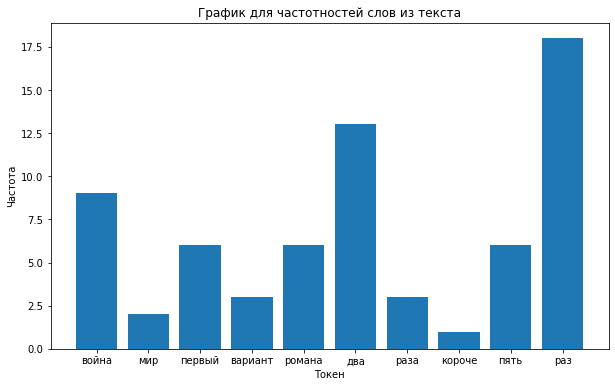

In [5]:
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
plt.rc('figure', figsize=(10, 6))

x = list(word_count.keys())[:10]
y = list(word_count.values())[:10]

plt.bar(x, y)
plt.title('График для частотностей слов из текста')
plt.xlabel('Токен')
plt.ylabel('Частота')
plt.show()

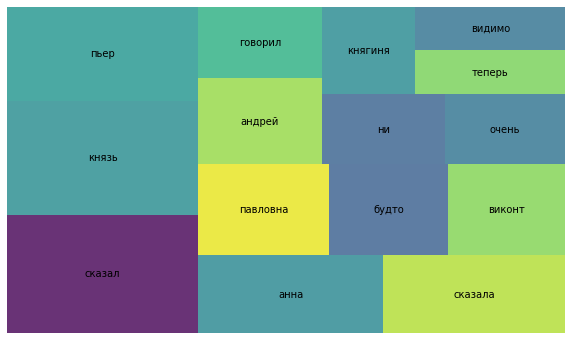

In [6]:
import squarify

wc_top20 = wc[wc['rank'] <= 15]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

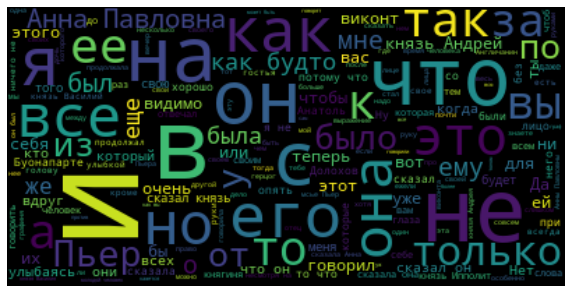

In [7]:
from wordcloud import WordCloud

text = open('test.txt', 'r', encoding='utf-8').read()

wordcloud = WordCloud(max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()